Question 1


What are the key steps of a data cleaning pipeline?

1. Drop unwanted features - You remove data that doesn't apply to the model, letting it work more efficently.
2. Check the missing data - If you know what's missing, it will help you accurately analyze the data in full.
3. Address missing values - Filling in the missing values eliminates gaps in the data.
4. Remove duplicates - Duplicate data is already a bad practice, as it can copy over mistakes. Never duplicate data.
5. Fix structual errors - Correct any errors that may have come from the cleaning. Some of these errors may include using the wrong data type. 
6. Check valid inputs for categorical features - Make sure there are no errors such as typos. Catagroical features only have a limited amounut of values.
7. Identify Numerical Outliers - Make sure all numeric values are within the min and max amounts.



Question 2

In [4]:
import pandas as pd
dataset = pd.read_csv('webautomation_coursera.csv')

In [5]:
print("shape", dataset.shape)

shape (242, 16)


In [6]:
print(dataset.head(10))

                                                 url  \
0  https://www.coursera.org/specializations/netwo...   
1        https://www.coursera.org/learn/2NAspeedNAit   
2  https://www.coursera.org/learn/fundamentalsNAn...   
3    https://www.coursera.org/learn/uxNAdesignNAjobs   
4  https://www.coursera.org/learn/databaseNAappli...   
5  https://www.coursera.org/learn/webNAdesignNAwi...   
6  https://www.coursera.org/learn/wireframesNAlow...   
7  https://www.coursera.org/learn/introductionNAp...   
8  https://www.coursera.org/specializations/virtu...   
9  https://www.coursera.org/specializations/cplus...   

                                               title  \
0          Networking in Google Cloud Specialization   
1  Two Speed IT: How Companies Can Surf the Digit...   
2              Fundamentals of Network Communication   
3  Design a User Experience for Social Good & Pre...   
4              Building Database Applications in PHP   
5               Web Design: Wireframes to Proto

In [7]:
print(dataset.dtypes)

url                                           object
title                                         object
associated-university-institution-company     object
type                                          object
image                                         object
category-subject-area                         object
certificate-is-available                      object
description                                   object
duration                                      object
language                                      object
level                                         object
prerequisites                                float64
price                                         object
rating                                       float64
syllabus                                      object
timestamp                                     object
dtype: object


Question 3

In [8]:
dataset = pd.read_csv('webautomation_coursera.csv')

remove = ['image', 'syllabus', 'description', 'prerequisites']
dataset.drop(remove, inplace=True, axis=1)

print(dataset.shape)


(242, 12)


Question 4

In [9]:
#First, we take all of the data that's considered null.
missing_values = dataset.isnull().sum()

In [10]:
#Then, we get it's percentage for each part of dataset.
percentage_missing = (missing_values / len(dataset)) * 100

In [11]:
missing_data = pd.DataFrame({
    'Missing Values': missing_values,
    'Percentage Missing': percentage_missing
})

In [12]:
print(missing_data)

                                           Missing Values  Percentage Missing
url                                                     0            0.000000
title                                                   3            1.239669
associated-university-institution-company              19            7.851240
type                                                    1            0.413223
category-subject-area                                   4            1.652893
certificate-is-available                               24            9.917355
duration                                               20            8.264463
language                                               20            8.264463
level                                                  55           22.727273
price                                                  20            8.264463
rating                                                 21            8.677686
timestamp                                               0       

Question 5

In [13]:
#Replacing the missing language value with 'English'
dataset['language'].fillna('English', inplace=True)

In [14]:
#Deleting the missing rating row
dataset.dropna(subset=['rating'], inplace=True)

In [15]:
#Deleting the rows that have more than three missing values
dataset.dropna(thresh=dataset.shape[1] - 3, inplace=True)

In [16]:
print("shape", dataset.shape)

shape (220, 12)


Question 6

In [17]:
#Set up for comparison
pre_duplication = dataset.shape[0]
#Checking for duplicates 
dataset.drop_duplicates(subset='url', keep='last', inplace=True)
#Set up for comparison
post_duplication = dataset.shape[0]

In [18]:
duplicates_removed = pre_duplication - post_duplication
print("Duplicates removed:", duplicates_removed)
print(dataset.shape)

Duplicates removed: 53
(167, 12)


Question 7

In [19]:
print(dataset.dtypes)

url                                           object
title                                         object
associated-university-institution-company     object
type                                          object
category-subject-area                         object
certificate-is-available                      object
duration                                      object
language                                      object
level                                         object
price                                         object
rating                                       float64
timestamp                                     object
dtype: object


In [20]:
dataset['timestamp'] = pd.to_datetime(dataset['timestamp'])
    
print(dataset.dtypes)

url                                                       object
title                                                     object
associated-university-institution-company                 object
type                                                      object
category-subject-area                                     object
certificate-is-available                                  object
duration                                                  object
language                                                  object
level                                                     object
price                                                     object
rating                                                   float64
timestamp                                    datetime64[ns, UTC]
dtype: object


In [21]:
#timestamp is now a datetime object.

Question 8

In [22]:
#Renaming
dataset.rename(columns={'associated-university-institution-company': 'institution'}, inplace=True)

In [23]:
print(dataset.head)

<bound method NDFrame.head of                                                    url  \
1          https://www.coursera.org/learn/2NAspeedNAit   
2    https://www.coursera.org/learn/fundamentalsNAn...   
3      https://www.coursera.org/learn/uxNAdesignNAjobs   
4    https://www.coursera.org/learn/databaseNAappli...   
5    https://www.coursera.org/learn/webNAdesignNAwi...   
..                                                 ...   
234  https://www.coursera.org/specializations/dataN...   
235  https://www.coursera.org/professionalNAcertifi...   
239  https://www.coursera.org/specializations/jhuNA...   
240  https://www.coursera.org/learn/physicalNAchemi...   
241    https://www.coursera.org/learn/basicNAchemistry   

                                                 title  \
1    Two Speed IT: How Companies Can Surf the Digit...   
2                Fundamentals of Network Communication   
3    Design a User Experience for Social Good & Pre...   
4                Building Database Applic

In [24]:
#Merging objects in institution
institution_mapping = {
    'Google Cloud': 'Google'
}

In [25]:
dataset['institution'] = dataset['institution'].replace(institution_mapping)

In [26]:
#Merging objects in type
type_mapping = {
    'professionalNAcertifications': 'professional certificates'
}

In [27]:
dataset['type'] = dataset['type'].replace(type_mapping)

In [28]:
print("Unique values in 'institution':", dataset['institution'].unique())
print("Unique values in 'type':", dataset['type'].unique())

Unique values in 'institution': ['CentraleSupélec' 'University of Colorado System' 'Google'
 'University of Michigan' 'California Institute of the Arts' nan
 'Michigan State University' 'University of Virginia' 'IBM Skills Network'
 'Advancing Women in Tech' 'University of Alberta'
 'University of Minnesota' 'University of California San Diego'
 'Amazon Web Services' 'Palo Alto Networks' 'Oracle' 'Juniper Networks'
 'Knowledge Accelerators' 'DeepLearning.AI' 'New York University' '(ISC)²'
 'IBM' 'Princeton University' 'Stanford University'
 'The Hong Kong University of Science and Technology'
 'Universidad de los Andes' 'University of Pennsylvania'
 'Imperial College London' 'University of California, Davis' 'Meta'
 'Universidad Austral' 'Alibaba Cloud Academy' 'Duke University' 'GitLab'
 'University of California, Irvine' 'University System of Georgia'
 'University of Toronto' 'Georgia Institute of Technology'
 'Macquarie University' 'Pontificia Universidad Católica de Chile'
 'McMast

In [29]:
print(dataset.head)

<bound method NDFrame.head of                                                    url  \
1          https://www.coursera.org/learn/2NAspeedNAit   
2    https://www.coursera.org/learn/fundamentalsNAn...   
3      https://www.coursera.org/learn/uxNAdesignNAjobs   
4    https://www.coursera.org/learn/databaseNAappli...   
5    https://www.coursera.org/learn/webNAdesignNAwi...   
..                                                 ...   
234  https://www.coursera.org/specializations/dataN...   
235  https://www.coursera.org/professionalNAcertifi...   
239  https://www.coursera.org/specializations/jhuNA...   
240  https://www.coursera.org/learn/physicalNAchemi...   
241    https://www.coursera.org/learn/basicNAchemistry   

                                                 title  \
1    Two Speed IT: How Companies Can Surf the Digit...   
2                Fundamentals of Network Communication   
3    Design a User Experience for Social Good & Pre...   
4                Building Database Applic

Question 9

In [30]:
#Check for outliers throughout rating
rating_outliers = dataset[(dataset['rating'] < 0) | (dataset['rating'] > 5)]

#Delete the outliers
dataset = dataset[(dataset['rating'] >= 0) & (dataset['rating'] <= 5)]

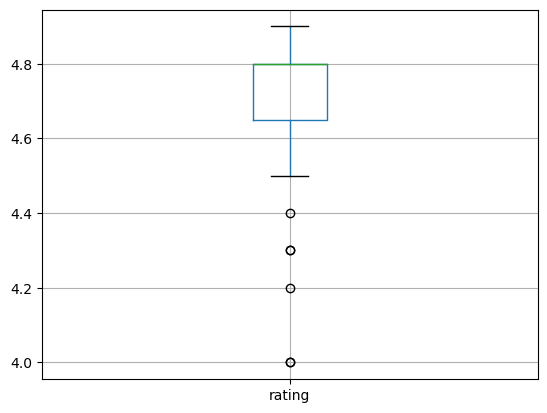

In [43]:
from matplotlib import pyplot as plt
dataset.boxplot(column=['rating'])
plt.show()

Question 10

In [40]:
#Using aggregation and the groupby function, we can find the average 
average_rating_institution = dataset.groupby('institution')['rating'].mean()

In [41]:
#sorting
average_rating_institution = average_rating_institution.sort_values(ascending=False).head(5)

In [42]:
print(average_rating_institution)

institution
Universidad Austral                                   4.90
Universidade de São Paulo                             4.90
Politecnico di Milano                                 4.90
Universidad de los Andes                              4.90
The Hong Kong University of Science and Technology    4.86
Name: rating, dtype: float64


Question 11

In [33]:
#Showing the amount of courses offered by each institution 
courses_per_institution = dataset.groupby('institution').size()

In [34]:
#Sorting
courses_per_institution  = courses_per_institution.sort_values(ascending=False).head(5)

In [35]:
print(courses_per_institution)

institution
Google                           37
IBM Skills Network               13
University of Michigan            7
University of Colorado System     7
Macquarie University              6
dtype: int64


Question 12


In [36]:
#Using a pivot table, we can set all of the margins we need for our different levels of instituions
pivot_table = pd.pivot_table(dataset, index='institution', columns='level', values='title', aggfunc='count', fill_value=0)

In [37]:
advanced = pivot_table['Advanced Level'].idxmax()
intermediate = pivot_table['Intermediate Level'].idxmax()
beginner = pivot_table['Beginner Level'].idxmax()

In [38]:
print(pivot_table)

print("Institution with the most advanced-level courses:", advanced)
print("Institution with the most intermediate-level courses:", intermediate)
print("Institution with the most beginner-level courses:", beginner)

level                                               Advanced Level  \
institution                                                          
(ISC)²                                                           0   
Advancing Women in Tech                                          0   
Alibaba Cloud Academy                                            0   
Amazon Web Services                                              0   
California Institute of the Arts                                 0   
DeepLearning.AI                                                  1   
Duke University                                                  0   
Georgia Institute of Technology                                  0   
GitLab                                                           0   
Google                                                           0   
IBM                                                              0   
IBM Skills Network                                               0   
Imperial College Lon

THIS IS AN INDIVIDUAL ASSIGNMENT. YOU MAY NOT DISCUSS THIS ASSIGNMENT WITH ANYONE WITHIN OR OUTSIDE THE CLASS (except the instructor).
- DO not discuss your approaches or your code with colleagues. There are many ways to implement this assignment, and it is extremely easy to spot code that has been inspired by someone else’s code and to identify unauthorized collaborations.
- If you choose to utilize something you find online, cite that resource, but DO NOT share that resource with anyone else.
By submitting this assignment, you certify that no unauthorized assistance has been received or given in the completion of this work.

Kade Levy